# Regresión logística para predicciones bancarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/bank/bank.csv", sep=";")

In [11]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [12]:
data.shape

(4119, 21)

In [13]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [14]:
data["y"] = (data["y"]=="yes").astype(int)

In [15]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [16]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [17]:
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])

In [18]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [19]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [20]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [21]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra del producto')

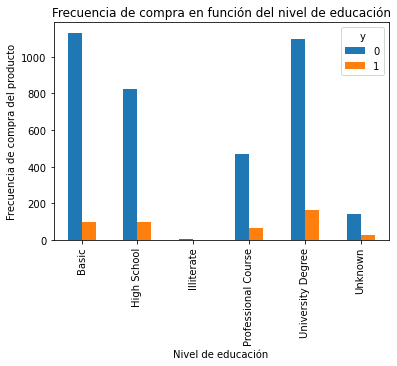

In [22]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporción de clientes')

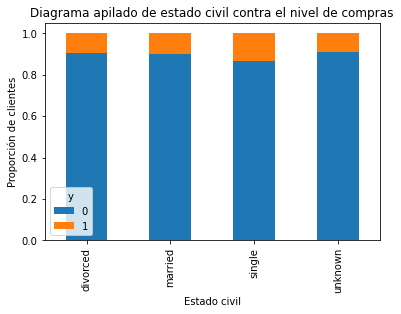

In [23]:
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Frecuencia de compra del producto')

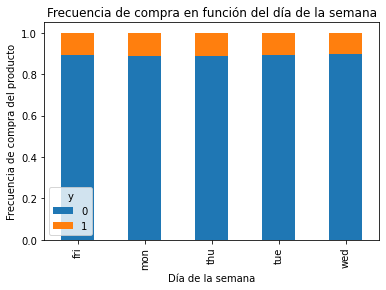

In [24]:
%matplotlib inline
table= pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

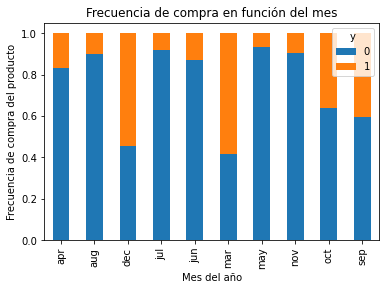

In [25]:
%matplotlib inline
table= pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

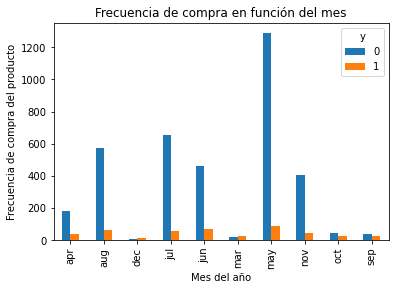

In [26]:
%matplotlib inline
table.plot(kind="bar", stacked=False)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Cliente')

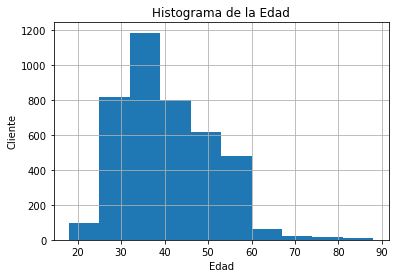

In [27]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

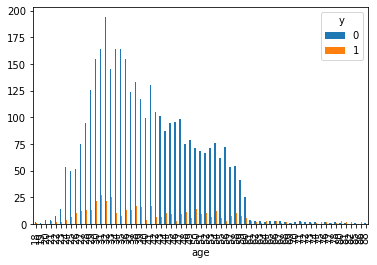

In [28]:
pd.crosstab(data.age, data.y).plot(kind="bar")

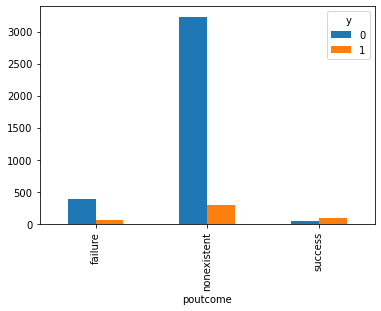

In [29]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")

### Conversión de las variables categóricas a dummies

In [42]:
categories = ["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"]
print(data)
for category in categories:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

      age          job  marital          education default  housing     loan  \
0      30  blue-collar  married              Basic      no      yes       no   
1      39     services   single        High School      no       no       no   
2      25     services  married        High School      no      yes       no   
3      38     services  married              Basic      no  unknown  unknown   
4      47       admin.  married  University Degree      no      yes       no   
...   ...          ...      ...                ...     ...      ...      ...   
4114   30       admin.  married              Basic      no      yes      yes   
4115   39       admin.  married        High School      no      yes       no   
4116   27      student   single        High School      no       no       no   
4117   58       admin.  married        High School      no       no       no   
4118   34   management   single        High School      no      yes       no   

        contact month day_of_week  ... 

ValueError: columns overlap but no suffix specified: Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown'],
      dtype='object')

In [31]:
data_vars = data.columns.values.tolist()

In [43]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["default"]]

In [44]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [34]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

### Selección de rasgos para el modelo

In [35]:
n = 12

In [36]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()

In [41]:
rfe = RFE(lr, n_features_to_select=12)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

C:\Users\URIEL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\URIEL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\URIEL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\URIEL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [39]:
print(rfe.support_) #Imprimir el suport, esto se hace para decidir cuales se van a quedar dentro.

[False False False False  True False False False  True False False False
 False False False  True False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
 False False False False False False False  True False  True]


In [32]:
print(rfe.ranking_) #Ranking de variables, cuales son las mas probables de quedar dentro del modelo. 

[38 37 17 45  1 19 24 22  1 34  2  8  5 39  7  1  6 23 43  1  1 42 16 27
 25 47 33 14 46 18 28  4  9 15 44 13 20 26 11  3 36 21  1  1  1  1  1 12
 40 41 31 30 29 35 10  1 32  1]


In [33]:
z=zip(bank_data_vars,rfe.support_, rfe.ranking_)

In [34]:
list(z) #Las variables que influencian al hecho de si compran o no. 

[('age', False, 38),
 ('duration', False, 37),
 ('campaign', False, 17),
 ('pdays', False, 45),
 ('previous', True, 1),
 ('emp.var.rate', False, 19),
 ('cons.price.idx', False, 24),
 ('cons.conf.idx', False, 22),
 ('euribor3m', True, 1),
 ('nr.employed', False, 34),
 ('y', False, 2),
 ('job_admin.', False, 8),
 ('job_blue-collar', False, 5),
 ('job_entrepreneur', False, 39),
 ('job_housemaid', False, 7),
 ('job_management', True, 1),
 ('job_retired', False, 6),
 ('job_self-employed', False, 23),
 ('job_services', False, 43),
 ('job_student', True, 1),
 ('job_technician', True, 1),
 ('job_unemployed', False, 42),
 ('job_unknown', False, 16),
 ('marital_divorced', False, 27),
 ('marital_married', False, 25),
 ('marital_single', False, 47),
 ('marital_unknown', False, 33),
 ('education_Basic', False, 14),
 ('education_High School', False, 46),
 ('education_Illiterate', False, 18),
 ('education_Professional Course', False, 28),
 ('education_University Degree', False, 4),
 ('education_Unkno

In [48]:
cols = ["previous", "euribor3m", "job_blue-collar", "job_retired", "month_aug", "month_dec", 
        "month_jul", "month_jun", "month_mar", "month_nov", "day_of_week_wed", "poutcome_nonexistent"] 
#Las columnas que nos ayudan, la tendencia de los meses si funciona. 

In [49]:
X = bank_data[cols]
Y = bank_data["y"] #Seleccion de variables, las variable predictoras y la variable a predecir. 

# 108. IMPLEMENTAR UNA REGRESION LOGISTICA CON PYTHON

### Implementación del modelo en Python con statsmodel.api

In [50]:
import statsmodels.api as sm

In [51]:
logit_model = sm.Logit(Y, X)

In [52]:
result = logit_model.fit() #Ejecuta el metodo de newton rapson para obtener el valor final del modelo. 

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [53]:
result.summary2()
#Devuelve toda la info relativa al modelo, el modelo que ha elaborado es logistico 
#la variable dependiente, que vamos a predecir es la columna "y", 
#Df Model = grados de libertad que tenemos, siempre es uno menos al numero de variables a predecir, 
#Df Residuals = Numero de observaciones menos los grados de libertad.
#Converged = si pone 1 es que ha convergido rapidamente. 
#lo de interes : 
# tenemos el resumen parada cada variable, las variables mas significativas aquellas que tienen un P valor muy pequeños.  
#

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.155     
Dependent Variable:   y                 AIC:               2427.6025 
Date:                 2021-04-04 15:35  BIC:               2503.4828 
No. Observations:     4119              Log-Likelihood:    -1201.8   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       6.4492e-88
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=====================================================================

"""

### Implementación del modelo en Python con scikit-learn
Esto lo haremos para ajustar el modelo y ver exactamente el resultado asi como los estadisticos a los que estamos acostumbrados en los modelos.

In [41]:
from sklearn import linear_model

In [42]:
logit_model = linear_model.LogisticRegression() #Primero crea el modelo y luego lo ajusta. 
logit_model.fit(X,Y)

LogisticRegression()

In [43]:
logit_model.score(X,Y) #Factor R2. cuanto mayor es. es mejor nuestra prediccion. 
#Nos da uno muy elevado, significa que es bastante alto en contraste con cualquier otro modelo que podemos crear. 

0.8958485069191552

In [44]:
1-Y.mean() 

0.8905074047098811

In [45]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_)))) #podemos crear un df apartir de hacer un zip de las columnas de x 
#con los valores que nos ha devuelto el modelo. 
#Estos son los valores que acompañan a dichas variables. 
#dichos valores tambien indican los cambios en escala logaritmica, por cada unidad de cambio de la variable. 
#ejemplo, si la variable previous aumenta en una unidad, el cociente de probas, el logaritmo del cociente,  se incrementara en medio punto
#y por lo tanto la probabilidad de compra incrementara de forma acorde. 


,0,1
0,previous,[0.5362541179381843]
1,euribor3m,[-0.5443670397995866]
2,job_blue-collar,[-0.3533138743513389]
3,job_retired,[0.36165159081170917]
4,month_aug,[0.6292588895072758]
5,month_dec,[1.1943974572117282]
6,month_jul,[0.9630554140662402]
7,month_jun,[1.0566897056470022]
8,month_mar,[1.6386680234582125]
9,month_nov,[0.4577084191059241]


# 109. VALIDACION DEL MODELO Y EVALUACION DEL MISMO 

El modelo anterior esta hecho con todo el conjunto de datos, lo mas normal es la division en conjunto de validacion y de entrenamiento, para evaluar la calidad del modelo

## Validación del modelo logístico

In [46]:
from sklearn.model_selection import train_test_split
#Metodo muy facil, nosotros le suplementamos la X y Y respectiva y esto lo divide solo, hace una asignacion multiple. 

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)
#Tenemos dos variables para entrenar y dos para validar, 

In [48]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train) #Hemos creado el modelo. la ecuacion que sustenta el modelo, lleva acabo las predicciones de las probas.

LogisticRegression()

In [49]:
from IPython.display import display, Math, Latex

In [50]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}'))
#Si la proba es mas pequeño se considerar como 0, sino como 1. 

<IPython.core.display.Math object>

In [51]:
probs = lm.predict_proba(X_test) #Para predecir las probas del conjunto de test. 
#Nos dara la proba estandar, nos dara la proba de estar seguros tanto de una respuesta positiva como negativa 
#de un conjunto de datos. 

In [52]:
probs
#la primera columna es la proba, como de seguro estoy de lo que digo
#la segunda da la proba de el valor de salida, la compra o la no compra. 
#si esa superior de lado derecho es superior a 0.5 entonces la observacion se catalogica como 1 o de "compra"
#herramientas fundamentales para poder decidir. 


array([[0.95409621, 0.04590379],
       [0.83896646, 0.16103354],
       [0.93216535, 0.06783465],
       ...,
       [0.65098445, 0.34901555],
       [0.97381005, 0.02618995],
       [0.57635748, 0.42364252]])

In [53]:
prediction = lm.predict(X_test)

In [54]:
prediction #array que contiene 0 o 1. menor a 0.5 lo toma como 0. 

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p >\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [56]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.045904,0
1,0.161034,1
2,0.067835,0
3,0.062222,0
4,0.042308,0


In [57]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,846
1,390


In [58]:
390/len(prob_df)*100 #Hemos incrementando un poco la compra de compradores. a un 31%

31.55339805825243

In [59]:
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,915
1,321


In [60]:
331/len(prob_df)*100

26.779935275080906

In [61]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,504
1,732


In [62]:
732/len(prob_df)*100

59.22330097087378

In [63]:
from sklearn import metrics

In [64]:
metrics.accuracy_score(Y_test, prediction) #en el 90% de los casos coincide, en cuantos casos acertamos. 

0.901294498381877

# 110. LA VALIDACION CRUZADA

## Validación cruzada
Tecnica muy utilizada para evaluar los resultados del analisis estadistico y garantizar que son independientes de la particion que se ha hecho entre el conjunto de entrenamiento y los datos de prueba. Podria ser que la particion estuviera mal hecha y no fuera adecuada, la validacion cruzada consiste en repetir el experimento varias veces, partiendo los datos las veces que tengan que ser necesarias y calcular la media aritmetica obtenida de las medias de evaluacion sobre distintas particiones llevadas acabo. Se utiliza en entornos donde el objetivo principal es predecir los datos, pero tambien se puede usar en el caso de clasificadores. En general, lo que se quiere estimar es la presicion del modelo que se llevara acabo a la practica, tecnica muy utilizada en proyectos de inteligencia artificial, para validar que modelos que se ha creado es correcto. 

### VALIDACION CRUZADA DE K ITERACIONES 
Los datos de muestran se dividen en k subconjuntos de forma que uno de ellos, se utiliza como los datos de prueba y el resto k-1 como datos de entrenamiento. En el proceso de validacion cruzada una vez que se ha llevado acabo se vuelve a repetir pero intercambiando los papeles y asi sucesivamente hasta llevar acabo un total de k iteraciones. De modo que cada uno de los posibles subconjuntos de datos de prueba acabo actuando como tal en algun momento de la iteracion. Despues de todo ellos, se relaiza la media aritmetica de cada iteracion para obtener asi un unico resultado final. Metodo muy preciso. Tiene una desventaja, es mas lento desde el punto de vista computacional. 
### VALIDACION CRUZADA ALEATORIA 
Metodo que consiste en dividir aleatoriamente el conjunto de datos de entrenamiento y de prueba, en este caso no sigue ningun patron, sino que para cada division la funcion de aproximacion se ajusta apartir de los datos de entrenamiento que se han elegido y se calculas los valores de salida para el conjunto de datos de prueba final. La ventaja es que la disivion no depende del numero de iteraciones que se lleven acabo. Aqui se escogen las muestras al azar durante k iteraciones de modo que al llevar acabo el calculo del error tenemos que volver a llevar acabo la media aritmetica de los k errores obtenidos segun la forma del metodo anteior. 
### VALIDACION CRUZADA DEJANDO UNO AFUERA 
Esta implica separar los datos de forma que para cada iteracion tengamos una sola muestra para los datos de prueba y todo el resto sea el conjunto de entrenamiento, la evaluacion viene dada por el error, en este tipo de validacion se tiende a tender un error muy bajo, a nivel computacional es muy dificil. por el numero que se deben hacer de iteraciones. 

La tecnica de validacion cruzada se lleva acabo en el dataset cuando intentamos hacer una prediccion para comprobar lo bien que el modelo es capaz de generalizar los resultados de modo que sea independiente del data set utilizado. la validacion cruzada se requiere en muchos casos para hacer que el modelo predictivo no sufra de problemas de overfitting. Todos los modelos se desarrollan basandose de un subconjunto de datos. 

Existe una tecnica que generaliza la division de un dataset en datos de entrenamiento y de testing, osea que generaliza la validacion cruzada, (pensando que la division de un data set es la forma mas primitiva de validacion cruzada) "validacion cruzada de k elementos", lo que se hace, es que el conjunto de datos original se divide en k particiones. De esas k, una siempre sera el conjunto de testing, las otras son el conjunto de entrenamiento, dicho proceso se repetira k veces. 
Para cada una de las iteraciones se medira la eficacia del modelo y al final, despues de k iteraciones, podremos promediar la eficacia del modelo. Si el promedio general es casi similar al de cada iteracion independiente, se puede concluir que el modelo hace una buena generalizacion y no lleva ningun problema. 
La ventaja de este metodo es que cada observacion acaba siendo parte del conjunto de testing y de entrenamiento por lo menos una vez. ¿Cual es una buena k?.  Nosotros podemos elegir la k que mejor se ajuste. 


In [65]:
from sklearn.model_selection import cross_val_score #Validacion cruzada

In [66]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10)

In [67]:
scores #Cada una de las presiciones, pero lo mas normal es pedirle el promedio. 

array([0.90533981, 0.88834951, 0.90533981, 0.89563107, 0.90048544,
       0.8907767 , 0.88349515, 0.89320388, 0.89320388, 0.88807786])

In [68]:
scores.mean() #89% de eficacia. es un metodo bastante bueno, podemos decir que el modelo generaliza bastante bien la informacion. 
#suministrada para ser entrenado. 
#Con esto hemos podido contrastar que el 90% de arriba no es en vano, por regla general con 10 particiones que hemos hecho del conjunto 
#de datos hemos conseguido una eficacia del 89%. 

0.8943903101599225

## Matrices de Confusión y curvas ROC

Una vez que hemos creado el modelo y lo hemos evaluado, la siguiente etapa es validar que el modelo es correcto, en muchos casos la regresion logistica o en general en cuaquier modelo de clasificacion, queremos validar que el modelo es correcto comparando el resultado real con el resultado que ha elaborado la prediccion del mismo, existen varias formas de hacerlo, pero el mas famoso, son las curvas ROC. una curva ROC es una herramienta grafica que nos sirve para entender el funcionamiento y la eficacia de  clasificacion que tiene un modelo, para el caso de la regresion logistica, pues basicamente una prediccion puede ser buena o mala, positiva o negativa, la prediccion puede ser correcta o incorrecta. 

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [70]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [71]:
probs = lm.predict_proba(X_test)

In [72]:
prob=probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>=threshold, 1, 0)
prob_df["actual"] = list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.045904,0,0
1,0.161034,1,0
2,0.067835,0,0
3,0.062222,0,0
4,0.042308,0,0


In [73]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)

In [74]:
TN=confusion_matrix[0][0]
TP=confusion_matrix[1][1]
FN=confusion_matrix[0][1]
FP=confusion_matrix[1][0]

In [75]:
sens = TP/(TP+FN)
sens

0.21025641025641026

In [76]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.047281323877068515

In [77]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1]
especifities_1 = [1]

for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0]>=t, 1, 0)
    prob_df["actual"] = list(Y_test)
    prob_df.head()

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN=confusion_matrix[0][0]
    TP=confusion_matrix[1][1]
    FP=confusion_matrix[0][1]
    FN=confusion_matrix[1][0]
    
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)

sensitivities.append(0)
especifities_1.append(0)

In [78]:
sensitivities

[1,
 0.9344262295081968,
 0.8442622950819673,
 0.680327868852459,
 0.6721311475409836,
 0.6639344262295082,
 0.6229508196721312,
 0.5163934426229508,
 0.45081967213114754,
 0.4016393442622951,
 0.36065573770491804,
 0.1721311475409836,
 0.12295081967213115,
 0]

In [79]:
especifities_1

[1,
 0.7800718132854578,
 0.5646319569120287,
 0.2989228007181328,
 0.2764811490125674,
 0.24596050269299818,
 0.21992818671454217,
 0.12387791741472176,
 0.08617594254937166,
 0.07181328545780974,
 0.06463195691202872,
 0.022441651705565557,
 0.013464991023339312,
 0]

In [80]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROC')

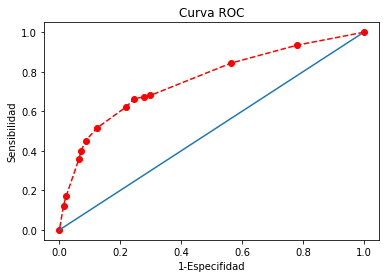

In [81]:
%matplotlib inline
plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

In [88]:
#HAY QUE ESPERAR QUE ACTUALICE GGPLOT LAS LIBRERIAS, SINO HAY QUE MODIFICAR ARCHIVOS INTERNOS

In [82]:
from sklearn import metrics
from pandas import Timestamp
from ggplot import *

AttributeError: module 'pandas' has no attribute 'tslib'

In [ ]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

In [83]:
df = pd.DataFrame({
    "esp":espc_1,
    "sens":sensit
})

NameError: name 'sensit' is not defined

In [84]:
df.head()

NameError: name 'df' is not defined

In [85]:
ggplot(df, aes(x="esp", y="sens")) +geom_line() + geom_abline(linetype="dashed")+xlim(-0.01,1.01)+ylim(-0.01,1.01)+xlab("1-Especifidad")+ylab("Sensibilidad")

NameError: name 'ggplot' is not defined

In [86]:
auc = metrics.auc(espc_1, sensit)
auc

NameError: name 'sensit' is not defined

In [87]:
ggplot(df, aes(x="esp", y="sens")) + geom_area(alpha=0.25)+geom_line(aes(y="sens"))+ggtitle("Curva ROC y AUC=%s"%str(auc))

NameError: name 'ggplot' is not defined

## RESUMEN DE LA REGRESION LOGISTICA 

Puede ser utilizada en una gran cantidad de casos donde la variable de lo que queremos predecir es binaria o bien categorica, en particular hemos visto todas las matematicas que hay detras de una regresion logistica y el proceso para implementarlas bien manualmente o bien utilizando sklearn. \ 
Con la regresion lineal y la regresion logistica ya tenemos dos herramientas utiles y casi cualquier dataset que tomemos, implementar una regresion logistica o una regresion lineal para predecir valores es lo minimo que pueda hacer un data science. 
en la proxima seccion, estudiaremos algoritmos no supervisados, algoritmos donde no necesariamente necesitaremos de un data set previo de datos historicos para hacer una prediccion, lo que conocemos como clustering o segmentacion. 

